# 1.Tidy Data  
R을 공부하다보면 분명 들어보았을 Tidy Data는 다음과 같은 원칙을 지키는 데이터입니다.  
- 각 변수는 하나의 열을 구성한다.
- 각 관측치는 행을 구성한다.
- 각 관측 단위가 하나의 테이블을 구성한다.
예를 보겠습니다.
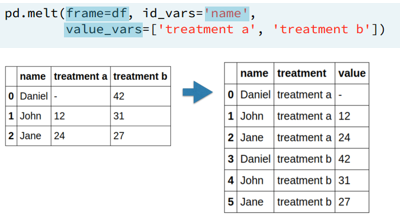 왼쪽을 와이드, 오른쪽이 롱데이터 타이디 데이터라고 한다.
그리고 지저분한 데이터는 다음과 같은 예가 있습니다.  
- 열 이름이 변수가 아닌 값이 있는 경우 
- 여러 개의 변수가 열 이름에 저장된 경우
- 변수가 행, 열에 모두 저장된 경우
- 여러 형식의 관측 단위가 같은 테이블에 저장된 경우
- 단일 관측 단위가 다수의 테이블에 저장된 경우  ->한명이 여러테이블에 나눠있을경우 지저분하다.

아직은 아리송한 분들은, 앞으로의 예제를 보면서 이해해보도록 하겠습니다.  

In [1]:
import pandas as pd
import numpy as np

state_fruit=pd.read_csv('data/state_fruit.csv',index_col=0)
state_fruit

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


위의 과일 데이터는 행에 주, 열에 과일이 있습니다.  
변수 값이 열 이름으로 들어가 있는 것을 알 수 있습니다.  
이를 풀어내기 위해 stack 메서드를 사용합니다.   

주별로 과일이 얼마나있는지 알 수있다. 그런데 texan와 apple을 한줄에! 넣어보자

In [2]:
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

결과는 series 가 됩니다. 

전에 배웠던 reset_index를 하게 되면 다음과 같이 변환됩니다. 

In [3]:
(
    state_fruit
    .stack()
    .reset_index()
) #다시 데이터프레임을 만들어본다.  그냥 숫자인덱스를 만들어줍니다. 

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


그런데 컬럼 이름이 이상해졌습니다. 고쳐보겠습니다. 

In [115]:
(
    state_fruit
    .stack()
    .reset_index()
    .rename(columns={##컬럼이나 인덱스의 이름을 바꾸기 위해 사용한다.
        'level_0':'state',
        'level_1':'fruit',
        0:'weight'
        })
)

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [116]:
state_fruit# 아래 3by3->9by3으로 이쁘게 바뀌었음을 알 수 있습니다.

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


위 방법 말고도 아래와 같이 할 수 있습니다. 

In [117]:
(
    state_fruit
    .stack()
    .rename_axis(['state','fruit'])#인덱스 이럼 설정해주기
    .reset_index(name='weight')#각각의 컬럼이름으로 들어간다.
)

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [9]:
state_fruit

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


stack 메서드는 대상이 되는 값을 쌓아주는 역할을 합니다.  
이 때, index를 잘 설정해주어야 합니다. 아래를 보겠습니다. 

In [10]:
state_fruit2=pd.read_csv('data/state_fruit2.csv')
state_fruit2 #주 이름자체가 컬럼으로 들어와있는 데이터프레임입니다. 

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


state가 index가 아니므로, 아래와 같은 결과가 나옵니다. 

In [11]:
state_fruit2.stack()

0  State       Texas
   Apple          12
   Orange         10
   Banana         40
1  State     Arizona
   Apple           9
   Orange          7
   Banana         12
2  State     Florida
   Apple           0
   Orange         14
   Banana        190
dtype: object

여기서 다시 index로 설정하면, 원래 의도한 결과를 내보냅니다.

In [13]:
state_fruit2.set_index('State').stack()

State          
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

stack 함수와 유사한 melt 에 대해 알아보겠습니다. 기능은 비슷하지만 조금의 유연성을 제공해줍니다.  
스택은 좀더 정해진걸 빠르게한다면 멜트는 좀더 유연성을 제공합니다. 그래서 스택일을 대부분 멜트로 할 수 있습니다.

In [14]:
state_fruit2=pd.read_csv('data/state_fruit2.csv')
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


melt 에서는 어떤 값을 기준으로 tidy data 변환을 할지 정할 수 있습니다.  
id_vars: 기준이 될 컬럼 리스트->어떤것을 앞으로 설정할건데?  
value_vars: 정리하려는 값을 가진 컬럼 리스트 ->tidy값을을 바꿀거다

In [15]:
state_fruit2.melt(id_vars=['State'],value_vars=['Apple','Orange','Banana'])

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


melt 에서는 컬럼명도 바꾸는 기능도 제공합니다. -> 이렇게 명시적으로 써주는게 좋다.   
나중에 코드를 수정할떄, 누군가에게 설명할때, 이렇게 명시적으로 써주는게 명목적 실행보다는 좋다.

In [118]:
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple','Orange','Banana'],
                 value_name='Weight',
                 var_name='Fruit')#숫자들에 대해서 이름을 붙일때

,State,Fruit,Weight
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


그냥 melt를 적용하면, 모든 것을 녹여버립니다.

In [119]:
state_fruit2.melt() #근데 웬만하면 위에 다써주자

,variable,value
0,State,Texas
1,State,Arizona
2,State,Florida
3,Apple,12
4,Apple,9
5,Apple,0
6,Orange,10
7,Orange,7
8,Orange,14
9,Banana,40


In [18]:
state_fruit2.melt(id_vars='State')

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


이번에는 여러 변수의 그룹을 동시에 스택해봅시다. 

In [19]:
movie=pd.read_csv('data/movie.csv')
actor=movie[['movie_title',
            'actor_1_name',
            'actor_2_name',
            'actor_3_name',
            'actor_1_facebook_likes',
            'actor_2_facebook_likes',
            'actor_3_facebook_likes',]]
actor.head()

,movie_title,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN


In [20]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


컬럼 이름의 통일성을 주기 위해 컬럼명_숫자 로 바꿔줍니다.  
movie_title, actor_1_name, actor_2_name, actor_3_name,  
actor_1_facebook_likes actor_2_facebook_likes, actor_3_facebook_likes

In [21]:
def change_col_name(col_name):
    col_name=col_name.replace('_name','')#name을 지워보겠습니다. 
    
    if 'facebook' in col_name:#find는 facebook이 등장하는 위치를 알려준다.
        fb_idx=col_name.find('facebook')
        col_name=(col_name[:5]+col_name[fb_idx-1:]+col_name[5:fb_idx-1])
        #actor+_facebook_likes+_1 2 3
    return col_name

In [22]:
actor2=actor.rename(columns=change_col_name)
actor2 
#actor_1_facebook_likes ->actor_faebook_likes-1 로 바뀌었습니다.

,movie_title,actor_1,actor_2,actor_3,actor_facebook_likes_1,actor_facebook_likes_2,actor_facebook_likes_3
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN
...,...,...,...,...,...,...,...
4911,Signed Sealed Delivered,Eric Mabius,Daphne Zuniga,Crystal Lowe,637.0,470.0,318.0
4912,The Following,Natalie Zea,Valorie Curry,Sam Underwood,841.0,593.0,319.0
4913,A Plague So Pleasant,Eva Boehnke,Maxwell Moody,David Chandler,0.0,0.0,0.0
4914,Shanghai Calling,Alan Ruck,Daniel Henney,Eliza Coupe,946.0,719.0,489.0


In [23]:
stubs=['actor','actor_facebook_likes']
actor2_tidy=pd.wide_to_long(actor2, stubnames=stubs,
                           i=['movie_title'],#처음에나올 인덱스레벨
                           j='actor_num',#두번째 나올 인덱스 레벨
                           sep='_')#구분자를 언더바로 했다. 

In [24]:
actor2_tidy

,,actor,actor_facebook_likes
movie_title,actor_num,,
Avatar,1,CCH Pounder,1000.0
Pirates of the Caribbean: At World's End,1,Johnny Depp,40000.0
Spectre,1,Christoph Waltz,11000.0
The Dark Knight Rises,1,Tom Hardy,27000.0
Star Wars: Episode VII - The Force Awakens,1,Doug Walker,131.0
...,...,...,...
Signed Sealed Delivered,3,Crystal Lowe,318.0
The Following,3,Sam Underwood,319.0
A Plague So Pleasant,3,David Chandler,0.0


숫자로 끝나는 컬럼은 자동적으로 잡아내지만, 그렇지 않으면 rename이 필요합니다.  
sep를 이용해서 규칙을 갖게 만듭니다.  

In [25]:
df=pd.read_csv('data/stackme.csv')
df

,State,Country,a1,b2,Test,d,e
0,TX,US,0.45,0.3,Test1,2,6
1,MA,US,0.03,1.2,Test2,9,7
2,ON,CAN,0.70,4.2,Test3,4,2


In [121]:
df.rename(columns={'a1':'group_a1','b2':'group1_b2',
                  'd':'group2_a1','e':'group2_b2'})

,State,Country,group_a1,group1_b2,Test,group2_a1,group2_b2
0,TX,US,0.45,0.3,Test1,2,6
1,MA,US,0.03,1.2,Test2,9,7
2,ON,CAN,0.70,4.2,Test3,4,2


In [125]:
pd.wide_to_long(
 df.rename(columns={'a1':'group1_a1', 'b2':'group1_b2', 'd': 'group2_a1', 'e': 'group2_b2'}),
 stubnames=['group1', 'group2'],
 i = ['State', 'Country', 'Test'],
 j='Label',
 suffix='.+', # 정규표현식. _ 뒤에 오는 모든 문자를 잡습니다. (a1, b2)
 sep='_'
)
#group1_"어떤문자열이든 잡아냄"(SUFFIX)
#group1(SEP)(SUFFIX)
#.+는 모든 문자를 의미한다. +는 개수에 상관없다는 뜻이다. 


group1  group2
State Country Test  Label                
TX    US      Test1 a1       0.45       2
                    b2       0.30       6
MA    US      Test2 a1       0.03       9
                    b2       1.20       7
ON    CAN     Test3 a1       0.70       4
                    b2       4.20       2

스택을 했으면 원래대로 돌려내는 방법도 알아야겠죠?  
unstack과 pivot을 이용합니다.  

원하는 컬럼만 선택하기 위해 간단한 함수를 만듭니다. 

In [29]:
def usecol_func(name):
    return 'UGDS_' in name or name=='INSTNM'

college=pd.read_csv('data/college.csv',
                   index_col='INSTNM',
                   usecols=usecol_func)#모든컬럼이 아닌 원하는 컬럼만 가져오겠다. 
college

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
college_stacked=college.stack(dropna=False)
college_stacked

INSTNM                                             
Alabama A & M University                 UGDS_WHITE    0.0333
                                         UGDS_BLACK    0.9353
                                         UGDS_HISP     0.0055
                                         UGDS_ASIAN    0.0019
                                         UGDS_AIAN     0.0024
                                                        ...  
Excel Learning Center-San Antonio South  UGDS_AIAN        NaN
                                         UGDS_NHPI        NaN
                                         UGDS_2MOR        NaN
                                         UGDS_NRA         NaN
                                         UGDS_UNKN        NaN
Length: 67815, dtype: float64

stack->unstack으로 되돌리기  
주의! NaN값은 삭제되므로, 처음 불러왔던 데이터와는 조금 다릅니다 !

In [31]:
college_stacked.unstack()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


melt를 사용한 경우 pivot으로 돌리면 됩니다.  

In [32]:
college2=pd.read_csv('data/college.csv',usecols=usecol_func)

In [33]:
college2

,INSTNM,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
1,University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
2,Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
3,University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
4,Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...,...
7530,SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7531,Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7532,National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7533,Bay Area Medical Academy - San Jose Satellite ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
college2.head()

,INSTNM,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
1,University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
2,Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
3,University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
4,Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [35]:
college_melted=college2.melt(id_vars='INSTNM',
                            var_name='Race',
                            value_name='Percentage')

In [37]:
college_melted

,INSTNM,Race,Percentage
0,Alabama A & M University,UGDS_WHITE,0.0333
1,University of Alabama at Birmingham,UGDS_WHITE,0.5922
2,Amridge University,UGDS_WHITE,0.2990
3,University of Alabama in Huntsville,UGDS_WHITE,0.6988
4,Alabama State University,UGDS_WHITE,0.0158
...,...,...,...
67810,SAE Institute of Technology San Francisco,UGDS_UNKN,NaN
67811,Rasmussen College - Overland Park,UGDS_UNKN,NaN
67812,National Personal Training Institute of Cleveland,UGDS_UNKN,NaN
67813,Bay Area Medical Academy - San Jose Satellite ...,UGDS_UNKN,NaN


In [39]:
melted_inv=college_melted.pivot(index='INSTNM',
                              columns='Race',
                              values='Percentage')
melted_inv

Race,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE
INSTNM,,,,,,,,,
A & W Healthcare Educators,0.0000,0.0000,0.0000,0.9750,0.0250,0.0000,0.0000,0.0000,0.0000
A T Still University of Health Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABC Beauty Academy,0.0000,0.0000,0.9333,0.0333,0.0333,0.0000,0.0000,0.0000,0.0000
ABC Beauty College Inc,0.0000,0.0000,0.0000,0.6579,0.0526,0.0000,0.0000,0.0000,0.2895
AI Miami International University of Art and Design,0.0018,0.0000,0.0018,0.0198,0.4773,0.0000,0.0025,0.4644,0.0324
...,...,...,...,...,...,...,...,...,...
Yukon Beauty College Inc,0.0000,0.1200,0.0000,0.0400,0.0000,0.0400,0.0000,0.0000,0.8000
Z Hair Academy,0.0211,0.0000,0.0000,0.0000,0.0211,0.0105,0.0000,0.0105,0.9368
Zane State College,0.0218,0.0029,0.0029,0.0296,0.0029,0.0005,0.0000,0.2399,0.6995


원래 순서가 아니지요? melt를 할 땐, index를 날리기 때문입니다.  
이를 맞추기 위해서는 우너래 데이터의 인덱스를 가져와야합니다.  

In [40]:
col2_rep=(
    melted_inv.loc[college2['INSTNM'],college2.columns[1:]]
    .reset_index()
)
col2_rep

,INSTNM,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
1,University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
2,Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
3,University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
4,Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...,...
7530,SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7531,Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7532,National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7533,Bay Area Medical Academy - San Jose Satellite ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이 메서드로 최종 확인

In [41]:
college2.equals(col2_rep) #두개를 완벽하게 복원했다

True

groupby와 unstack섞어보기  
groupby로 그룹별 정보를 모은 뒤 unstack해 새로운 df를 만들어보겠습니다.

In [42]:
emp=pd.read_csv('data/employee.csv')
(
    emp.groupby("RACE")
    ['BASE_SALARY']
    .mean()
    .astype(int)
)

RACE
American Indian or Alaskan Native    60272
Asian/Pacific Islander               61660
Black or African American            50137
Hispanic/Latino                      52345
Others                               51278
White                                64419
Name: BASE_SALARY, dtype: int32

여기서 그룹 하나를 추가해보겠습니다. 

In [43]:
(
    emp.groupby(["RACE",'GENDER'])#인종별 성별로 그룹화
    ['BASE_SALARY']#기본급의 평균의 인티져타입.
    .mean()
    .astype(int)
)

RACE                               GENDER
American Indian or Alaskan Native  Female    60238
                                   Male      60305
Asian/Pacific Islander             Female    63226
                                   Male      61033
Black or African American          Female    48915
                                   Male      51082
Hispanic/Latino                    Female    46503
                                   Male      54782
Others                             Female    63785
                                   Male      38771
White                              Female    66793
                                   Male      63940
Name: BASE_SALARY, dtype: int32

위의 결과를 unstack하면 조금 더 보기가 좋겠네요.  
unstack 시 기준이 되는 것을 입력합시다.  

In [44]:
(
    emp.groupby(["RACE",'GENDER'])
    ['BASE_SALARY']
    .mean()
    .astype(int)
    .unstack('GENDER')
)

GENDER,Female,Male
RACE,,
American Indian or Alaskan Native,60238,60305
Asian/Pacific Islander,63226,61033
Black or African American,48915,51082
Hispanic/Latino,46503,54782
Others,63785,38771
White,66793,63940


반대로 RACE를 기준으로 unstack 할 수도 있겠죠?

In [46]:
(
    emp.groupby(["RACE",'GENDER'])
    ['BASE_SALARY']
    .mean()
    .astype(int)
    .unstack('RACE')
    .T
)

GENDER,Female,Male
RACE,,
American Indian or Alaskan Native,60238,60305
Asian/Pacific Islander,63226,61033
Black or African American,48915,51082
Hispanic/Latino,46503,54782
Others,63785,38771
White,66793,63940


만약 두 개 이상의 집계함수를 이용한다면, 레벨이 여러 개 생길겁니다.  
이 경우, 어떤 것을 기준으로 unstack 하느냐가 중요해지겠죠?

In [47]:
(
    emp.groupby(["RACE",'GENDER'])
    ['BASE_SALARY']
    .agg(['mean','max','min'])
    .astype(int)
    .unstack("RACE")
    .unstack('GENDER')
)

      RACE                               GENDER
mean  American Indian or Alaskan Native  Female     60238
                                         Male       60305
      Asian/Pacific Islander             Female     63226
                                         Male       61033
      Black or African American          Female     48915
                                         Male       51082
      Hispanic/Latino                    Female     46503
                                         Male       54782
      Others                             Female     63785
                                         Male       38771
      White                              Female     66793
                                         Male       63940
max   American Indian or Alaskan Native  Female     98536
                                         Male       81239
      Asian/Pacific Islander             Female    130416
                                         Male      163228
      Black or African A

각 항공사별, 출발지 별 결항편에 대한 합을 피벗테이블로 나타냈습니다. 

In [48]:
flights = pd.read_csv('data/flights.csv')
fpt = flights.pivot_table(index='AIRLINE',
 columns='ORG_AIR',
 values='CANCELLED',#결함
 aggfunc='sum',#집계함수로 sum을 썼다.
 fill_value=0)#결측치면 이렇게 하겠다.
fpt


ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2
AS,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1
DL,28,1,0,0,1,1,4,0,1,2
EV,18,6,27,36,0,0,6,53,0,0
F9,0,2,1,0,1,1,1,4,0,0
HA,0,0,0,0,0,0,0,0,0,0
MQ,5,0,62,0,0,0,0,85,0,0
NK,1,1,6,0,1,1,3,10,2,0


위를 groupby를 하려면, pivot_table에서 사용한 인덱스와 컬럼으로 groupby를 한 후, 집계하면 됩니다.

In [49]:
(
    flights
    .groupby(['AIRLINE','ORG_AIR'])#두개를 그룹화
    ['CANCELLED']
    .sum()
    .unstack(fill_value=0)#unstack형태로 데이터프레임, 결측치가있으면 0으로 !
)

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2
AS,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1
DL,28,1,0,0,1,1,4,0,1,2
EV,18,6,27,36,0,0,6,53,0,0
F9,0,2,1,0,1,1,1,4,0,0
HA,0,0,0,0,0,0,0,0,0,0
MQ,5,0,62,0,0,0,0,85,0,0
NK,1,1,6,0,1,1,3,10,2,0


이번에는 조금 더 복잡한 pivot_table을 만들어보겠습니다.

In [50]:
flights.pivot_table(index=['AIRLINE', 'MONTH'],
 columns=['ORG_AIR', 'CANCELLED'],
 values=['DEP_DELAY', 'DIST'],
 aggfunc=['sum', 'mean'],
 fill_value=0)

sum                                        ...  \
              DEP_DELAY                                        ...   
ORG_AIR             ATL      DEN      DFW     IAH      LAS     ...   
CANCELLED             0  1     0  1     0  1    0  1     0  1  ...   
AIRLINE MONTH                                                  ...   
AA      1           -13  0   113  0  4276 -3  117  0  1036  0  ...   
        2           -39  0    71  0  2662  0    8  0   -55  0  ...   
        3            -2  0    69  0  5692  0  109  0   326  0  ...   
        4             1  0   304  0  3518  0  104  0   790  0  ...   
        5            52  0   352  0  5510  0   55  0    93  0  ...   
...                 ... ..   ... ..   ... ..  ... ..   ... ..  ...   
WN      7          2604  0  1919  0     0  0    0  0  4600  0  ...   
        8          1718  0  1180  0     0  0    0  0  3151  0  ...   
        9          1033  0   705  0     0  0    0  0  1400  0  ...   
        11          700  0  1372  0     0  0    0  0  1309  0  ...   
        12         1679  0  1898  0     0  0    0  0  2327  0  ...   

                      mean                                              \
                      DIST                                               
ORG_AIR                LAX                       MSP               ORD   
CANCELLED                0            1            0    1            0   
AIRLINE MONTH                                                            
AA      1      1678.037037  2475.000000   809.000000  0.0  1068.876033   
        2      1745.892308  1818.000000  1008.000000  0.0  1193.782178   
        3      1781.567568  1744.000000   964.733333  0.0  1058.933333   
        4      1850.923913     0.000000   648.714286  0.0  1094.633094   
        5      1820.478261     0.000000   787.250000  0.0   998.774775   
...                    ...          ...          ...  ...          ...   
WN      7       912.453704   327.777778   647.266667  0.0     0.000000   
        8       835.404040   346.000000   508.703704  0.0     0.000000   
        9       830.210000   317.666667   644.416667  0.0     0.000000   
        11      748.404040   459.333333   573.642857  0.0     0.000000   
        12      811.695238  1067.000000   634.736842  0.0     0.000000   

                                                                    
                                                                    
ORG_AIR                            PHX                 SFO          
CANCELLED               1            0      1            0       1  
AIRLINE MONTH                                                       
AA      1        0.000000  1167.666667    0.0  1860.166667     0.0  
        2      771.142857  1311.461538  868.0  1337.916667  2586.0  
        3      802.000000  1171.363636    0.0  1502.758621     0.0  
        4      943.600000  1266.214286    0.0  1646.903226     0.0  
        5      999.500000  1240.444444    0.0  1436.892857     0.0  
...                   ...          ...    ...          ...     ...  
WN      7        0.000000   799.160256  369.0   636.210526     0.0  
        8        0.000000   891.569767    0.0   644.857143   392.0  
        9        0.000000   872.840000    0.0   731.578947   354.5  
        11       0.000000   823.258741  872.0   580.875000   392.0  
        12       0.000000   778.420690    0.0   782.256410     0.0  

[149 rows x 80 columns]

위와 같은 것을 만들 때엔, groupby 후 어떻게 unstack을 하느냐가 중요합니다. 

In [51]:
(
 flights
 .groupby(['AIRLINE', 'MONTH', 'ORG_AIR', 'CANCELLED'])
 [['DEP_DELAY', 'DIST']]
 .agg(['mean', 'sum'])
 .unstack(['ORG_AIR', 'CANCELLED'], fill_value=0)
 .swaplevel(0, 1, axis='columns') # index 레벨을 바꾸고 싶을 때 사용
    #0번레벨과 1번레벨을 바꾸고싶을때 사용한다. 
)


mean                                                       \
               DEP_DELAY                                                        
ORG_AIR              ATL             DEN             DFW             IAH        
CANCELLED              0    1          0    1          0    1          0    1   
AIRLINE MONTH                                                                   
AA      1      -3.250000  0.0   7.062500  0.0  11.977591 -3.0   9.750000  0.0   
        2      -3.000000  NaN   5.461538  NaN   8.756579  NaN   1.000000  NaN   
        3      -0.166667  NaN   7.666667  0.0  15.383784  NaN  10.900000  0.0   
        4       0.071429  0.0  20.266667  0.0  10.501493  NaN   6.933333  0.0   
        5       5.777778  0.0  23.466667  NaN  16.798780  NaN   3.055556  NaN   
...                  ...  ...        ...  ...        ...  ...        ...  ...   
WN      7      21.700000  0.0  13.143836  0.0   0.000000  0.0   0.000000  0.0   
        8      16.207547  0.0   7.375000  0.0   0.000000  0.0   0.000000  0.0   
        9       8.680672  0.0   4.378882  0.0   0.000000  0.0   0.000000  0.0   
        11      5.932203  NaN   8.215569  NaN   0.000000  0.0   0.000000  0.0   
        12     15.691589  0.0  12.166667  NaN   0.000000  0.0   0.000000  0.0   

                               ...     sum                                \
                               ...    DIST                                 
ORG_AIR              LAS       ...     LAX          MSP        ORD         
CANCELLED              0    1  ...       0     1      0  1       0     1   
AIRLINE MONTH                  ...                                         
AA      1      32.375000  0.0  ...  135921  2475   7281  0  129334     0   
        2      -3.055556  NaN  ...  113483  5454   5040  0  120572  5398   
        3      12.074074  0.0  ...  131836  1744  14471  0  127072   802   
        4      27.241379  0.0  ...  170285     0   4541  0  152154  4718   
        5       2.818182  0.0  ...  167484     0   6298  0  110864  1999   
...                  ...  ...  ...     ...   ...    ... ..     ...   ...   
WN      7      22.439024  NaN  ...   98545  2950  19418  0       0     0   
        8      16.158974  NaN  ...   82705  1384  13735  0       0     0   
        9       7.179487  0.0  ...   83021   953  15466  0       0     0   
        11      7.522989  NaN  ...   74092  1378   8031  0       0     0   
        12     11.994845  NaN  ...   85228  2134  12060  0       0     0   

                                         
                                         
ORG_AIR           PHX         SFO        
CANCELLED           0    1      0     1  
AIRLINE MONTH                            
AA      1       21018    0  33483     0  
        2       17049  868  32110  2586  
        3       25770    0  43580     0  
        4       17727    0  51054     0  
        5       11164    0  40233     0  
...               ...  ...    ...   ...  
WN      7      124669  369  24176     0  
        8      153350    0  18056   784  
        9      130926    0  27800   709  
        11     117726  872  23235   784  
        12     112871    0  30508     0  

[149 rows x 80 columns]

인덱스 레벨 설정  
인덱스 레벨이 있다는 것은 unscak(level)을 통해 알게 되었습니다. 이 레벨들에 이름을 붙일 수 있다면 조금 더 편하게 레벨 관리를 할 수 있습니다. 아래를 보겠습니다. 

In [52]:
college=pd.read_csv('data/college.csv')
(
    college
    .groupby(['STABBR','RELAFFIL'])
    [['UGDS','SATMTMID']]
    .agg(['size','min','max'])
)

UGDS                 SATMTMID              
                size    min      max     size    min    max
STABBR RELAFFIL                                            
AK     0           7  109.0  12865.0        7    NaN    NaN
       1           3   27.0    275.0        3  503.0  503.0
AL     0          72   12.0  29851.0       72  420.0  590.0
       1          24   13.0   3033.0       24  400.0  560.0
AR     0          68   18.0  21405.0       68  427.0  565.0
...              ...    ...      ...      ...    ...    ...
WI     0          87   20.0  29302.0       87  480.0  680.0
       1          25    4.0   8212.0       25  452.0  605.0
WV     0          65   20.0  44924.0       65  430.0  530.0
       1           8   63.0   1375.0        8  455.0  510.0
WY     0          11   52.0   9910.0       11  540.0  540.0

[112 rows x 6 columns]

rename_axis를 이용해, 레벨의 이름을 정해줍니다. 

In [53]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis(['AGG_COLS' ,'AGG_FUNCS'], axis=1)#axis=1을해줘야 컬럼으로 쓴다.
)


AGG_COLS        UGDS                 SATMTMID              
AGG_FUNCS       size    min      max     size    min    max
STABBR RELAFFIL                                            
AK     0           7  109.0  12865.0        7    NaN    NaN
       1           3   27.0    275.0        3  503.0  503.0
AL     0          72   12.0  29851.0       72  420.0  590.0
       1          24   13.0   3033.0       24  400.0  560.0
AR     0          68   18.0  21405.0       68  427.0  565.0
...              ...    ...      ...      ...    ...    ...
WI     0          87   20.0  29302.0       87  480.0  680.0
       1          25    4.0   8212.0       25  452.0  605.0
WV     0          65   20.0  44924.0       65  430.0  530.0
       1           8   63.0   1375.0        8  455.0  510.0
WY     0          11   52.0   9910.0       11  540.0  540.0

[112 rows x 6 columns]

stack 시 바로 이용

In [54]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis(['AGG_COLS' ,'AGG_FUNCS'], axis=1)
 .stack('AGG_FUNCS')
)


AGG_COLS                      UGDS  SATMTMID
STABBR RELAFFIL AGG_FUNCS                   
AK     0        size           7.0       7.0
                min          109.0       NaN
                max        12865.0       NaN
       1        size           3.0       3.0
                min           27.0     503.0
...                            ...       ...
WV     1        min           63.0     455.0
                max         1375.0     510.0
WY     0        size          11.0      11.0
                min           52.0     540.0
                max         9910.0     540.0

[332 rows x 2 columns]

index level 사이 스왑을 통해 위치를 변경해보겠습니다.

In [55]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis(['AGG_COLS' ,'AGG_FUNCS'], axis=1)
 .stack('AGG_FUNCS')
 .swaplevel('AGG_FUNCS', 'STABBR', axis=0)
 #axis 에서 0 은 'index', 1은 'columns'와 같습니다.
)


AGG_COLS                      UGDS  SATMTMID
AGG_FUNCS RELAFFIL STABBR                   
size      0        AK          7.0       7.0
min       0        AK        109.0       NaN
max       0        AK      12865.0       NaN
size      1        AK          3.0       3.0
min       1        AK         27.0     503.0
...                            ...       ...
                   WV         63.0     455.0
max       1        WV       1375.0     510.0
size      0        WY         11.0      11.0
min       0        WY         52.0     540.0
max       0        WY       9910.0     540.0

[332 rows x 2 columns]

sort를 해줘 데이터를 정돈해봅시다.

In [56]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis(['AGG_COLS' ,'AGG_FUNCS'], axis=1)
 .stack('AGG_FUNCS')
 .swaplevel('AGG_FUNCS', 'STABBR', axis=0)
 .sort_index(level='RELAFFIL', axis='index')
 .sort_index(level='AGG_COLS', axis=1) #지금은 보여드리기 위해 혼용하지만, 하나의 규칙을 정해 일괄적으로 사용하세요 !
)

AGG_COLS                   SATMTMID      UGDS
AGG_FUNCS RELAFFIL STABBR                    
max       0        AK           NaN   12865.0
                   AL         590.0   29851.0
                   AR         565.0   21405.0
                   AS           NaN    1276.0
                   AZ         580.0  151558.0
...                             ...       ...
size      1        VI           1.0       1.0
                   VT           5.0       5.0
                   WA          17.0      17.0
                   WI          25.0      25.0
                   WV           8.0       8.0

[332 rows x 2 columns]

stack과 unstack을 왔다갔다하며 내가 원하는 형태로 만듭니다.

In [57]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis(['AGG_COLS' ,'AGG_FUNCS'], axis=1)
 .stack('AGG_FUNCS')
 .unstack(['RELAFFIL', 'STABBR'])

)


AGG_COLS      UGDS                                                             \
RELAFFIL         0      1        0       1        0       1       0             
STABBR          AK     AK       AL      AL       AR      AR      AS        AZ   
AGG_FUNCS                                                                       
size           7.0    3.0     72.0    24.0     68.0    18.0     1.0     124.0   
min          109.0   27.0     12.0    13.0     18.0    20.0  1276.0       1.0   
max        12865.0  275.0  29851.0  3033.0  21405.0  4485.0  1276.0  151558.0   

AGG_COLS                    ... SATMTMID                                   \
RELAFFIL        1        0  ...        1      0    1      0      1      0   
STABBR         AZ       CA  ...       VI     VT   VT     WA     WA     WI   
AGG_FUNCS                   ...                                             
size          9.0    609.0  ...      1.0   22.0  5.0  106.0   17.0   87.0   
min          25.0      0.0  ...      NaN  425.0  NaN  485.0  496.0  480.0   
max        4102.0  44744.0  ...      NaN  685.0  NaN  655.0  605.0  680.0   

AGG_COLS                               
RELAFFIL       1      0      1      0  
STABBR        WI     WV     WV     WY  
AGG_FUNCS                              
size        25.0   65.0    8.0   11.0  
min        452.0  430.0  455.0  540.0  
max        605.0  530.0  510.0  540.0  

[3 rows x 224 columns]

모두 Stack 시키면, 하나의 series로 정리됩니다.

In [58]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis(['AGG_COLS' ,'AGG_FUNCS'], axis=1)
 .stack(['AGG_FUNCS', 'AGG_COLS'])
)


STABBR  RELAFFIL  AGG_FUNCS  AGG_COLS
AK      0         size       UGDS            7.0
                             SATMTMID        7.0
                  min        UGDS          109.0
                  max        UGDS        12865.0
        1         size       UGDS            3.0
                                          ...   
WY      0         size       SATMTMID       11.0
                  min        UGDS           52.0
                             SATMTMID      540.0
                  max        UGDS         9910.0
                             SATMTMID      540.0
Length: 640, dtype: float64

In [59]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis(['AGG_COLS' ,'AGG_FUNCS'], axis=1)
 .unstack(['STABBR', 'RELAFFIL'])
)

AGG_COLS  AGG_FUNCS  STABBR  RELAFFIL
UGDS      size       AK      0             7.0
                             1             3.0
                     AL      0            72.0
                             1            24.0
                     AR      0            68.0
                                         ...  
SATMTMID  max        WI      1           605.0
                     WV      0           530.0
                             1           510.0
                     WY      0           540.0
                             1             NaN
Length: 708, dtype: float64

레벨의 이름들을 지우고 싶을 땐, rename_index에서 **None**을 주면 됩니다.   
레벨 이름이 지저분하거나, 지우는 것이 더 깔끔할 때! 이렇게 하세요.

In [60]:
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATMTMID']]
 .agg(['size', 'min', 'max'])
 .rename_axis([None, None], axis=1)
 .rename_axis([None, None], axis=0)

)


UGDS                 SATMTMID              
     size    min      max     size    min    max
AK 0    7  109.0  12865.0        7    NaN    NaN
   1    3   27.0    275.0        3  503.0  503.0
AL 0   72   12.0  29851.0       72  420.0  590.0
   1   24   13.0   3033.0       24  400.0  560.0
AR 0   68   18.0  21405.0       68  427.0  565.0
...   ...    ...      ...      ...    ...    ...
WI 0   87   20.0  29302.0       87  480.0  680.0
   1   25    4.0   8212.0       25  452.0  605.0
WV 0   65   20.0  44924.0       65  430.0  530.0
   1    8   63.0   1375.0        8  455.0  510.0
WY 0   11   52.0   9910.0       11  540.0  540.0

[112 rows x 6 columns]

열 이름에 변수가 포함될 때  
열 이름이 변수값을 포함하는 경우가 있습니다. 이런 데이터를 만나면 매우 화가 납니다만, 
생각보다 자주! 만나게 됩니다.  
이를 처리하기 위해서는 melt를 활용해봅시다. 

In [62]:
wl = pd.read_csv('data/weightlifting_men.csv')
wl

,Weight Category,M35 35-39,M40 40-44,M45 45-49,M50 50-54,M55 55-59,M60 60-64,M65 65-69,M70 70-74,M75 75-79,M80 80+
0,56,137,130,125,115,102,92,80,67,62,55
1,62,152,145,137,127,112,102,90,75,67,57
2,69,167,160,150,140,125,112,97,82,75,60
3,77,182,172,165,150,135,122,107,90,82,65
4,85,192,182,175,160,142,130,112,95,87,70
5,94,202,192,182,167,150,137,120,100,90,75
6,105,210,200,190,175,157,142,122,102,95,80
7,105+,217,207,197,182,165,150,127,107,100,85


In [63]:

wl.melt(id_vars='Weight Category',
 var_name='sex_age',
 value_name='Qual Total')

,Weight Category,sex_age,Qual Total
0,56,M35 35-39,137
1,62,M35 35-39,152
2,69,M35 35-39,167
3,77,M35 35-39,182
4,85,M35 35-39,192
...,...,...,...
75,77,M80 80+,65
76,85,M80 80+,70
77,94,M80 80+,75
78,105,M80 80+,80


이제는 성별과 나이가 합쳐진 곳에서, 정보를 나눕니다.

In [64]:
(
 wl.melt(id_vars='Weight Category',
 var_name='sex_age',
 value_name='Qual Total')
 ['sex_age']
 .str.split(expand=True) #split 은 기본적으로 공백을 이용해서 문자열을 분리합니다.
    #expand=True하면 최종적인 데이터프레임형태이다.
)


,0,1
0,M35,35-39
1,M35,35-39
2,M35,35-39
3,M35,35-39
4,M35,35-39
...,...,...
75,M80,80+
76,M80,80+
77,M80,80+
78,M80,80+


열의 이름을 바꾸고, 첫 번째 열에서 성별문자를 추출합니다.

In [65]:
(
 wl.melt(id_vars='Weight Category',
 var_name='sex_age',
 value_name='Qual Total')
 ['sex_age']
 .str.split(expand=True)
 .rename(columns={0:'Sex', 1:'Age Group'})
 .assign(Sex=lambda df_: df_.Sex.str[0])#assign을 이용해서 0번 캐릭터를 가져와라. 따라서 M만 가져온다. 
)

,Sex,Age Group
0,M,35-39
1,M,35-39
2,M,35-39
3,M,35-39
4,M,35-39
...,...,...
75,M,80+
76,M,80+
77,M,80+
78,M,80+


이제 위의 두 DF를 합칩니다. 이 내용은 이따 더 나와요!

In [66]:
wl_melted = wl.melt(id_vars='Weight Category',
 var_name='sex_age',
 value_name='Qual Total')
sex_age = (wl_melted['sex_age']
 .str.split(expand=True)
 .rename(columns={0:'Sex', 1:'Age Group'})
 .assign(Sex=lambda df_: df_.Sex.str[0]))
pd.concat([wl_melted[['Weight Category', 'Qual Total']], sex_age], axis=1)

,Weight Category,Qual Total,Sex,Age Group
0,56,137,M,35-39
1,62,152,M,35-39
2,69,167,M,35-39
3,77,182,M,35-39
4,85,192,M,35-39
...,...,...,...,...
75,77,65,M,80+
76,85,70,M,80+
77,94,75,M,80+
78,105,80,M,80+


여러 변수가 단일 열에 들어 있을 때에도 잘 나눠줘야 합니다. 아래를 볼까요?

In [67]:
inspections = pd.read_csv('data/restaurant_inspections.csv',
 parse_dates=['Date']) #parse_dates 로 선택한 열은, pandas 의 da
inspections

,Name,Date,Info,Value
0,E & E Grill House,2017-08-08,Borough,MANHATTAN
1,E & E Grill House,2017-08-08,Cuisine,American
2,E & E Grill House,2017-08-08,Description,Non-food contact surface improperly constructe...
3,E & E Grill House,2017-08-08,Grade,A
4,E & E Grill House,2017-08-08,Score,9.0
...,...,...,...,...
495,PIER SIXTY ONE-THE LIGHTHOUSE,2017-09-01,Borough,MANHATTAN
496,PIER SIXTY ONE-THE LIGHTHOUSE,2017-09-01,Cuisine,American
497,PIER SIXTY ONE-THE LIGHTHOUSE,2017-09-01,Description,Filth flies or food/refuse/sewage-associated (...
498,PIER SIXTY ONE-THE LIGHTHOUSE,2017-09-01,Grade,Z


한 식당의 여러 정보가 쭉 나열되어 있는 경우죠. pivot을 이용해 돌려줍시다.  
책에서는 되지 않는다고 써있지만, pandas 버전이 올라가면서 아래와 같이 할 수 있습니다. 

In [68]:
inspections.pivot(index=['Name','Date'],
                 columns='Info',
                 values='Value')

,Info,Borough,Cuisine,Description,Grade,Score
Name,Date,,,,,
3 STAR JUICE CENTER,2017-05-10,BROOKLYN,"Juice, Smoothies, Fruit Salads",Facility not vermin proof. Harborage or condit...,A,12.0
A & L PIZZA RESTAURANT,2017-08-22,BROOKLYN,Pizza,Facility not vermin proof. Harborage or condit...,A,9.0
AKSARAY TURKISH CAFE AND RESTAURANT,2017-07-25,BROOKLYN,Turkish,Plumbing not properly installed or maintained;...,A,13.0
ANTOJITOS DELI FOOD,2017-06-01,BROOKLYN,"Latin (Cuban, Dominican, Puerto Rican, South &...",Live roaches present in facility's food and/or...,A,10.0
BANGIA,2017-06-16,MANHATTAN,Korean,Covered garbage receptacle not provided or ina...,A,9.0
...,...,...,...,...,...,...
VALL'S PIZZERIA,2017-03-15,STATEN ISLAND,Pizza/Italian,Wiping cloths soiled or not stored in sanitizi...,A,9.0
VIP GRILL,2017-06-12,BROOKLYN,Jewish/Kosher,Hot food item not held at or above 140Âº F.,A,10.0
WAHIZZA,2017-04-13,MANHATTAN,Pizza,"No facilities available to wash, rinse and san...",A,10.0


reset_index와 rename_index를 이용해 정리해줍시다. 

In [69]:
inspections.pivot(index=['Name','Date'],
                 columns='Info',
                 values='Value').reset_index().rename_axis(None,axis=1)

,Name,Date,Borough,Cuisine,Description,Grade,Score
0,3 STAR JUICE CENTER,2017-05-10,BROOKLYN,"Juice, Smoothies, Fruit Salads",Facility not vermin proof. Harborage or condit...,A,12.0
1,A & L PIZZA RESTAURANT,2017-08-22,BROOKLYN,Pizza,Facility not vermin proof. Harborage or condit...,A,9.0
2,AKSARAY TURKISH CAFE AND RESTAURANT,2017-07-25,BROOKLYN,Turkish,Plumbing not properly installed or maintained;...,A,13.0
3,ANTOJITOS DELI FOOD,2017-06-01,BROOKLYN,"Latin (Cuban, Dominican, Puerto Rican, South &...",Live roaches present in facility's food and/or...,A,10.0
4,BANGIA,2017-06-16,MANHATTAN,Korean,Covered garbage receptacle not provided or ina...,A,9.0
...,...,...,...,...,...,...,...
95,VALL'S PIZZERIA,2017-03-15,STATEN ISLAND,Pizza/Italian,Wiping cloths soiled or not stored in sanitizi...,A,9.0
96,VIP GRILL,2017-06-12,BROOKLYN,Jewish/Kosher,Hot food item not held at or above 140Âº F.,A,10.0
97,WAHIZZA,2017-04-13,MANHATTAN,Pizza,"No facilities available to wash, rinse and san...",A,10.0
98,WANG MANDOO HOUSE,2017-08-29,QUEENS,Korean,Accurate thermometer not provided in refrigera...,A,12.0


둘 이상의 값이 한 셀에 저장될 때엔, split을 해줘야 합니다. 

In [70]:
cities= pd.read_csv('data/texas_cities.csv')
cities#위도와 경도, 

,City,Geolocation
0,Houston,"29.7604° N, 95.3698° W"
1,Dallas,"32.7767° N, 96.7970° W"
2,Austin,"30.2672° N, 97.7431° W"


Geolocation의 데이터가 복잡합니다. 총 4개의 정보가 들어있습니다.  
위도, 위도의 방형(방향), 경도, 경도 방형   
일단 위도와 경도로 나눠 봅시다. regex를 이용합니다.

In [71]:
geos = cities.Geolocation.str.split(pat='. ', expand=True) # '. '은 공백 앞에 어떤 문자가
geos.columns = ['Lat', 'Lat Dir', 'Long', 'Long Dir']
geos

,Lat,Lat Dir,Long,Long Dir
0,29.7604,N,95.3698,W
1,32.7767,N,96.7970,W
2,30.2672,N,97.7431,W


이제 두 데이터를 붙입니다.

In [72]:
geos['cities'] = cities['City']

In [73]:
geos

,Lat,Lat Dir,Long,Long Dir,cities
0,29.7604,N,95.3698,W,Houston
1,32.7767,N,96.7970,W,Dallas
2,30.2672,N,97.7431,W,Austin


조금 복잡한 정규 표현식으로는 아래와 같이 표현할 수도 있습니다. 

In [74]:
cities.Geolocation.str.extract(r'([0-9.]+). (N|S), ([0-9.]+). (E|W)', expand=True)
#숫자 여러개, N과S둘중에 하나, 숫자 여러개, E와W중에 하나

,0,1,2,3
0,29.7604,N,95.3698,W
1,32.7767,N,96.7970,W
2,30.2672,N,97.7431,W


마지막으로 열 이름과 값으로 변수가 저장되었을 때를 다뤄봅시다. 

In [75]:
sensors = pd.read_csv('data/sensors.csv')
sensors

,Group,Property,2012,2013,2014,2015,2016
0,A,Pressure,928,873,814,973,870
1,A,Temperature,1026,1038,1009,1036,1042
2,A,Flow,819,806,861,882,856
3,B,Pressure,817,877,914,806,942
4,B,Temperature,1008,1041,1009,1002,1013
5,B,Flow,887,899,837,824,873


연도 표시가 열 이름에 있으니, 이를 내려줘야겠죠?

In [76]:
sensors.melt(id_vars=['Group', 'Property'],
 var_name='Year')


,Group,Property,Year,value
0,A,Pressure,2012,928
1,A,Temperature,2012,1026
2,A,Flow,2012,819
3,B,Pressure,2012,817
4,B,Temperature,2012,1008
5,B,Flow,2012,887
6,A,Pressure,2013,873
7,A,Temperature,2013,1038
8,A,Flow,2013,806
9,B,Pressure,2013,877


여기에 pivot_table을 적용하면 깔끔하게 정리가능합니다. 

In [77]:
(
 sensors.melt(id_vars=['Group', 'Property'],
 var_name='Year')
 .pivot_table(index=['Group', 'Year'],
 columns='Property', values='value')
 .reset_index()
 .rename_axis(None, axis=1)
)

,Group,Year,Flow,Pressure,Temperature
0,A,2012,819,928,1026
1,A,2013,806,873,1038
2,A,2014,861,814,1009
3,A,2015,882,973,1036
4,A,2016,856,870,1042
5,B,2012,887,817,1008
6,B,2013,899,877,1041
7,B,2014,837,914,1009
8,B,2015,824,806,1002
9,B,2016,873,942,1013


# Pandas 객체 병합  
DF든 S든 여러개를 만든 뒤 병합을 할 수 있어야, 분석용 데이터를 만들 수 있다.  
SQL의 Join과 유사한 merge메서드를 사용할 수도 있고,
df.append나 pd.concat을 쓸 수도 있습니다.  
하나씩 알아봅시다.  

In [78]:
names=pd.read_csv('data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


여기에 새로운 데이터를 추가해봅시다. 

In [79]:
new_name=['Aria',1]
names.loc[4]=new_name
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


길이를 이용해 넣는다는 것을 이용하면 아래와 같이도 할 수 있습니다. 

In [80]:
names.loc[len(names)]=['Tom',5]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
5,Tom,5


아니면 dictionary 형태로도!

In [81]:
names.loc[len(names)]={'Name':'Kim',"age":10}

In [82]:
names

,Name,Age
0,Cornelia,70.0
1,Abbas,69.0
2,Penelope,4.0
3,Niko,2.0
4,Aria,1.0
5,Tom,5.0
6,Kim,NaN


같은 원리로 Series를 합칠 수도 있습니다. 

In [83]:
names.loc[len(names)]=pd.Series({'Age':50,'Name':'Park'})

In [84]:
names

,Name,Age
0,Cornelia,70.0
1,Abbas,69.0
2,Penelope,4.0
3,Niko,2.0
4,Aria,1.0
5,Tom,5.0
6,Kim,NaN
7,Park,50.0


하지만 이런 방법보다 append를 좀 더 많이 쓰게 됩니다.  
append는 행을 추가할 때 사용합니다.(열은 X)  
ignore_index를 True로 해주지 않으면 dictionary를 삽입할 때 에러가 나요

In [85]:
names.append({'Name':'Lee','Age':99},ignore_index=True)
#인덱스 값을 무시하 고 넣겠다.

,Name,Age
0,Cornelia,70.0
1,Abbas,69.0
2,Penelope,4.0
3,Niko,2.0
4,Aria,1.0
5,Tom,5.0
6,Kim,NaN
7,Park,50.0
8,Lee,99.0


In [86]:
names

,Name,Age
0,Cornelia,70.0
1,Abbas,69.0
2,Penelope,4.0
3,Niko,2.0
4,Aria,1.0
5,Tom,5.0
6,Kim,NaN
7,Park,50.0


append는 df자체를 바꾸지 않고, 값을 복사해옵니다.  
그러니까 df 업데이트를 위해서는 다시 할당 선언을 해줍니다.  

In [87]:
names=names.append(names) #append는  df에 df를 위-아래로 붙여줍니다.  
names

,Name,Age
0,Cornelia,70.0
1,Abbas,69.0
2,Penelope,4.0
3,Niko,2.0
4,Aria,1.0
5,Tom,5.0
6,Kim,NaN
7,Park,50.0
0,Cornelia,70.0
1,Abbas,69.0


인덱스가 뒤죽박죽입니다. 정리해보죠  
지금은 같은 DF를 붙였기에, 동일 내용이 두 개씩 들어간 것을 알 수 있습니다.  

In [88]:
names=names.reset_index(drop=True)

In [89]:
names

,Name,Age
0,Cornelia,70.0
1,Abbas,69.0
2,Penelope,4.0
3,Niko,2.0
4,Aria,1.0
5,Tom,5.0
6,Kim,NaN
7,Park,50.0
8,Cornelia,70.0
9,Abbas,69.0


중복을 지울 땐 names.drop_duplicate()

이렇게 하나씩 입력하는 것은 열의 수가 적을 때나 가능합니다.  
열이 열개만 넘어가도 헷갈립니다.

In [90]:
bball = pd.read_csv('data/baseball16.csv')
bball

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0
5,gomezca01,2016,1,HOU,AL,85,295,27,62,16,...,29.0,13.0,2.0,21,100.0,2.0,4.0,3.0,0.0,11.0
6,gonzama01,2016,1,HOU,AL,141,484,55,123,26,...,51.0,12.0,6.0,22,118.0,1.0,5.0,6.0,1.0,16.0
7,gourryu01,2016,1,HOU,AL,36,130,13,34,7,...,15.0,1.0,1.0,5,12.0,0.0,1.0,0.0,1.0,7.0
8,kempto01,2016,1,HOU,AL,59,120,15,26,4,...,7.0,2.0,1.0,14,27.0,0.0,0.0,1.0,1.0,5.0
9,marisja01,2016,1,HOU,AL,118,287,40,60,18,...,21.0,10.0,5.0,16,83.0,0.0,3.0,4.0,1.0,4.0


오타를 줄이기 위해서는 기존의 값 하나를 가져와서 dictionary화 한 다음, Key-value 중 value를!

In [91]:
data_dic = bball.loc[0].to_dict()
new_data_dic = {k:'' if isinstance(v, str) else
 np.nan for k, v in data_dic.items()}

In [92]:
new_data_dic
#이렇게 보면 어떤것을 채워넣야하는지 쉽게 알 수 있다.

{'playerID': '',
 'yearID': nan,
 'stint': nan,
 'teamID': '',
 'lgID': '',
 'G': nan,
 'AB': nan,
 'R': nan,
 'H': nan,
 '2B': nan,
 '3B': nan,
 'HR': nan,
 'RBI': nan,
 'SB': nan,
 'CS': nan,
 'BB': nan,
 'SO': nan,
 'IBB': nan,
 'HBP': nan,
 'SH': nan,
 'SF': nan,
 'GIDP': nan}

보통 한 줄씩 혹은 한 개씩 데이터를 추가하진 않습니다. 너무 비효율적이거든요.  
데이터를 모아서 한 번에 합치는 것이 효율적입니다.  
이번에는 여러 DF를 연결해보겠습니다.  

In [93]:
stocks_16 = pd.read_csv('data/stocks_2016.csv', index_col='Symbol')
stocks_17 = pd.read_csv('data/stocks_2017.csv', index_col='Symbol')
stocks_16


,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [94]:
stocks_17

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


이번엔 concat 함수를 사용합니다. append는 상하로만 붙일 수 있었지만,  
concat은 방향이 자유입니다.  
그러니까 append 는 concat 의 축소판인 것이죠.  


In [126]:
pd.concat([stocks_16, stocks_17])
#append보다 더 넣은 사용범위를 제공합니다. concat

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


하나로 합치긴 했는데, 연도를 구분할 수가 없네요.  
키를 넣어줘야 하겠습니다.

In [97]:
pd.concat([stocks_16, stocks_17],
 keys=['2016', '2017'],
 names=['Years', 'Symbol'])

Shares  Low  High
Years Symbol                   
2016  AAPL        80   95   110
      TSLA        50   80   130
      WMT         40   55    70
2017  AAPL        50  120   140
      GE         100   30    40
      IBM         87   75    95
      SLB         20   55    85
      TXN        500   15    23
      TSLA       100  100   300

In [98]:
#axis 매개변수를 추가하면 옆으로도 붙일 수 있습니다.
pd.concat([stocks_16, stocks_17],
 keys=['2016', '2017'],
 names=['Years', None],
 axis=1)

Years   2016                2017              
      Shares   Low   High Shares    Low   High
AAPL    80.0  95.0  110.0   50.0  120.0  140.0
TSLA    50.0  80.0  130.0  100.0  100.0  300.0
WMT     40.0  55.0   70.0    NaN    NaN    NaN
GE       NaN   NaN    NaN  100.0   30.0   40.0
IBM      NaN   NaN    NaN   87.0   75.0   95.0
SLB      NaN   NaN    NaN   20.0   55.0   85.0
TXN      NaN   NaN    NaN  500.0   15.0   23.0

한 해에만 존재하는 종목들은 NaN값이 나오죠?
DB에서 이런 결합을 outer join 이라고 합니다.
만약 양쪽 모두에 등장하는 것만 표시하고 싶을 땐, inner join 형태로 사용합니다.

In [99]:

pd.concat([stocks_16, stocks_17],
 keys=['2016', '2017'],
 names=['Years', None],
 axis=1, join='inner') #조인의 inner의 차이


Years    2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

여기서 비슷한 용도로 사용되는 병합 함수들을 정리하고 갑시다.    
- pd.concat  
    - 둘 이상의 pandas 객체를 수직/수평으로 합침  
    - 인덱스에 대해서만 정렬  
    - 인덱스 중복 허용 X  
    - 기본 outer join, inner join 가능  
- df.join  
    - 둘 이상의 pandas 객체를 수평으로 병함  
    - 호출하는 DF의 인덱스 기준으로 다른 객체 인덱스 정렬  
    - 합쳐지는 열/인덱스에 중복 값 발생 시 카티션 곱 생성  
    - 기본 left join (left, right, outer 가능)  
- df.merge  
    - DF 으로 조인  
    - 호출하는 DF의 인덱스 기준으로 다른 객체 인덱스 정렬  
    - 합쳐지는 열/인덱스에 중복 값 발생 시 카티션 곱 생성  
    - 기본 inner join, (left, right, outer 가능) 
상황에 따라 특정 방법이 더 단순할 수 있습니다.    
아래의 코드를 봅시다.    
 

In [101]:
years = 2016, 2017, 2018
stock_tables = [pd.read_csv(f'data/stocks_{year}.csv', index_col='Symbol')
 for year in years]
s_16, s_17, s_18 = stock_tables
s_16


,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [102]:
s_17

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [103]:
s_18

,Shares,Low,High
Symbol,,,
AAPL,40,135,170
AMZN,8,900,1125
TSLA,50,220,400


In [104]:
#concat 으로 먼저 붙여봅시다.
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [105]:
# axis=1 로 하면 옆으로!
pd.concat(stock_tables, keys=[2016, 2017, 2018], axis=1)


2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0

만약 join 을 사용해서 위의 결과를 만들고 싶다면 다음과 같이 합니다.
하지만 suffix를 반드시 설정해주어야합니다 (컬럼명이 같아서 애러 발생)

In [106]:
s_16.join(s_17, lsuffix='_16', rsuffix='_17', how='outer')

,Shares_16,Low_16,High_16,Shares_17,Low_17,High_17
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [108]:
#위 방법을 응용해서 3년을 합치면 다음과 같습니다.
other = [s_17.add_suffix('_17'), s_18.add_suffix('_18')]
s_16.add_suffix('_16').join(other, how='outer')


,Shares_16,Low_16,High_16,Shares_17,Low_17,High_17,Shares_18,Low_18,High_18
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


In [109]:
#merge는 내가 기준으로 삼을 컬럼을 지정할 수 있다는 특징이 있습니다.
#다음 예를 봅시다.
names = ['prices', 'transactions']
food_tables = [pd.read_csv(f'data/food_{name}.csv') for name in names]


In [110]:
food_price, food_trans = food_tables

In [111]:
food_price

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015


In [112]:
food_trans

,custid,item,store,quantity
0,1,pear,A,5
1,1,banana,A,10
2,2,steak,B,3
3,2,pear,B,1
4,2,peach,B,2
5,2,steak,B,1
6,2,coconut,B,4


In [113]:
food_trans.merge(food_price, on=['item', 'store'])


,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


In [114]:
food_trans.merge(food_price.query('Date == 2017'), how='left') #query
#코코넛이 원래는 없었는데 data join을 하면서 살아났다.

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


정리하자면, 주로 쓰는 것은 concat, merge, join, append 인데,  
append 는 concat 의 특수 케이스이고,  
merge는 인덱스가 아닌 열에 대한 병합이 필요할 때,  
join 은 인덱스에 대한 병합이 필요할 때,  
그 외에는 concat을 쓰면 됩니다.  